In [1]:
import numpy as np
from scipy.io import loadmat
import pysindy as ps
import matplotlib.pyplot as plt

from pysindy.differentiation import SpectralDerivative

In [2]:
wave1=np.loadtxt('wave1.txt')
wave2=np.loadtxt('wave2.txt')

c1= 4.6000000000000002e-01
c2= 4.6500000000000002e-01

In [3]:
def get_diffs(wave,c):
    R=wave[:,0]
    x=wave[:,1]
    Y=wave[:,2]

    sd1=SpectralDerivative(d=1)
    sd2=SpectralDerivative(d=2)
    sd3=SpectralDerivative(d=3)

    Yd1=sd1(Y,R)
    Yd2=sd2(Y,R)
    Yd3=sd3(Y,R)

    Ut=-c*Yd1
    Ux=Yd1
    Uxx=Yd2
    Uxxx=Yd3
    U=Y

    Uxdiffs=np.vstack([U,Ux,Uxx,Uxxx]).T
    return Ut,Uxdiffs

Ut,Xdiffs=get_diffs(wave2,c2)

def get_equation(
        Ut,
        Uxdiffs,
        optimizer,
        degree=2,
        ):
    feature_library=ps.PolynomialLibrary(degree=degree)
    poly=feature_library.fit_transform(
        Uxdiffs
    )
    names=feature_library.get_feature_names(['(U)','(Ux)','(Uxx)','(Uxxx)'])

    fitted=optimizer.fit(
        poly,Ut
    )

    eqn="Ut = "
    extra=""

    for coef,term in zip(np.around(fitted.coef_,4)[0],names):
        if term =='1':
            extra+=f"{coef}"
        if coef!=0:
            if coef>0:
                extra+=f" + {coef} * {term}"
            else:
                extra+=f" - {-1*coef} * {term}"
    eqn=eqn+extra

    r2=1-np.mean((Ut-poly@(fitted.coef_[0]))**2)/np.var(Ut)
    print(r2)
    return eqn


In [4]:
optimizer=ps.STLSQ(threshold=0.001,alpha=0)

Ut1,Xdiffs1=get_diffs(wave1,c1)

print(get_equation(Ut1,Xdiffs1,optimizer))

Ut2,Xdiffs2=get_diffs(wave2,c2)

print(get_equation(Ut2,Xdiffs2,optimizer))

1.0
Ut = 0.0 - 0.46 * (Ux)
1.0
Ut = 0.0 - 0.465 * (Ux)


In [278]:
Ut_total=np.hstack([Ut1,Ut2])

Xdiffs_total = np.vstack([Xdiffs1,Xdiffs2])

0.9913042011989596
Ut = 0.0 - 0.4738 * (Ux) + 1.2012 * (U) (Ux)


In [293]:
optimizer=ps.SR3(threshold=0.1,nu=0.001)

print(get_equation(Ut_total,Xdiffs_total,optimizer=optimizer))

0.9913042011989596
Ut = 0.0 - 0.4738 * (Ux) + 1.2012 * (U) (Ux)


In [295]:
optimizer=ps.FROLS(
    max_iter=1,
    alpha=0
)

print(get_equation(Ut_total,Xdiffs_total,optimizer=optimizer))

0.9999711432356039
Ut = 0.0 - 0.4628 * (Ux)


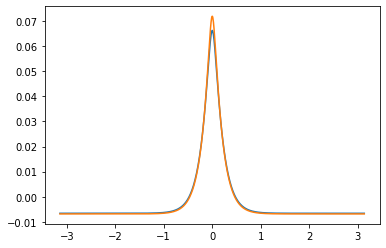

In [298]:
plt.plot(wave1[:,0],wave1[:,2])
plt.plot(wave2[:,0],wave2[:,2])

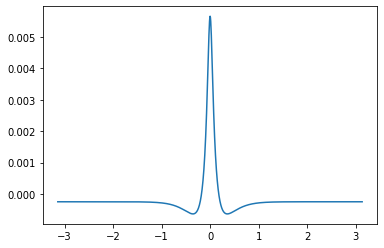

In [299]:
plt.plot(wave1[:,0],wave2[:,2]-wave1[:,2])


In [305]:
Xdiffs_total.shape

(2048, 4)

In [339]:
custom_features=np.vstack([
    Xdiffs_total[:,0]*Xdiffs_total[:,1],
    Xdiffs_total[:,3],
]).T

optimizer=ps.STLSQ(threshold=0.0,alpha=0)

fitted=optimizer.fit(custom_features,Ut_total)

C=fitted.coef_[0]

1-np.mean((custom_features@C-Ut_total)**2)/np.var(Ut_total)

0.8931481028426101

In [342]:
16384/4

4096.0

In [329]:
C

array([[-5.32144362e-17,  9.49794925e-04]])